# Introduction 😃😃😃

### Finding Donors for Charity

### About Dataset

Every year, 90% of Americans give money to charities. Is such generosity necessarily welfare enhancing for the giver? We present a theoretical framework that distinguishes two types of motivation: individuals like to give, for example, due to altruism or warm glow, and individuals would rather not give but dislike saying no, for example, due to social pressure. We design a door-to-door fund-raiser in which some households are informed about the exact time of solicitation with a flyer on their doorknobs. Thus, they can seek or avoid the fund-raiser. We find that the flyer reduces the share of households opening the door by 9% to 25% and, if the flyer allows checking a Do Not Disturb box, reduces giving by 28% to 42%. The latter decrease is concentrated among donations smaller than $10
These findings suggest that social pressure is an important determinant of door- to-door giving. 
Combining data from this and a complementary field experiment, we structurally estimate the model.
The estimated social pressure cost of saying no to a solicitor is $3.80 for an in-state charity and $1.40 for an out-of-state charity.
Our welfare calculations suggest that our door-to-door fund-raising campaigns on average lower the utility of the potential donors



### Columns
- age
- workclass
- education_level
- education-num	
- marital-status
- occupation
- relationship
- race
- sex
- capital-gain
- capital-loss
- hours-per-week
- native-country
- income


# Work plan 🤝🤝🤝🤝🤝

- 1- Data Exploration & Analysis 🤝🤝🤝
- 2- Building a Machine Learning Model / classification score Volume


# Data Exploration & Analysis 🤝🤝🤝

In [7]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [8]:
#Importing the dataset
df =pd.read_csv("census.csv")


# look the data set
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [9]:
# looking the shape DataSet
df.shape

(45222, 14)

In [10]:
#Checking the dtypes of all the columns

df.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
# missing value

df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- No any missing value

In [ ]:
# check unique value
df.nunique().sort_values()

sex                  2
income               2
race                 5
relationship         6
workclass            7
marital-status       7
occupation          14
education_level     16
education-num       16
native-country      41
age                 74
hours-per-week      96
capital-loss        97
capital-gain       121
dtype: int64

In [ ]:
# look  describe data set
df.describe().round(2)

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.00,45222.00,45222.00,45222.00,45222.00
mean,38.55,10.12,1101.43,88.60,40.94
std,13.22,2.55,7506.43,404.96,12.01
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,47.00,13.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


# Some of Visualisations and Analysis


<AxesSubplot:xlabel='workclass', ylabel='count'>

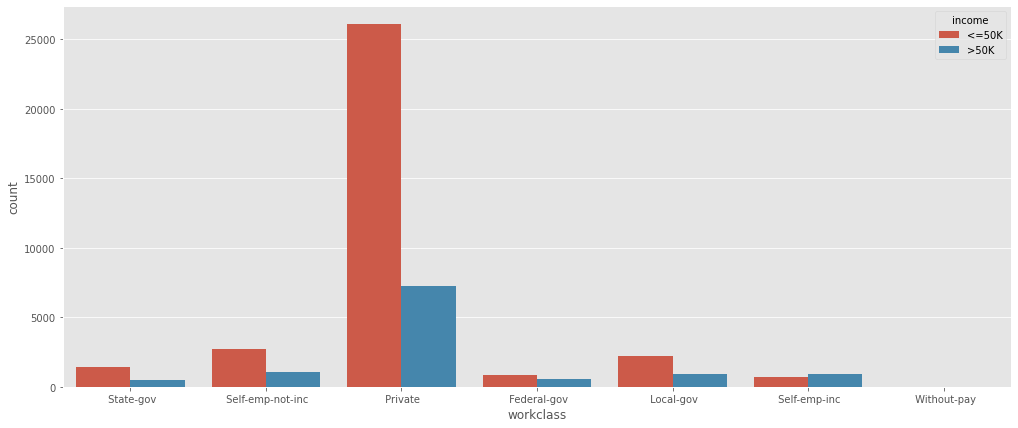

In [ ]:
# show count work class by income

plt.figure(figsize=(17,7))
sns.countplot(x=df["workclass"],hue=df["income"])

- working private total income less 50k , also another work class the same not big different .

-

<AxesSubplot:xlabel='age', ylabel='count'>

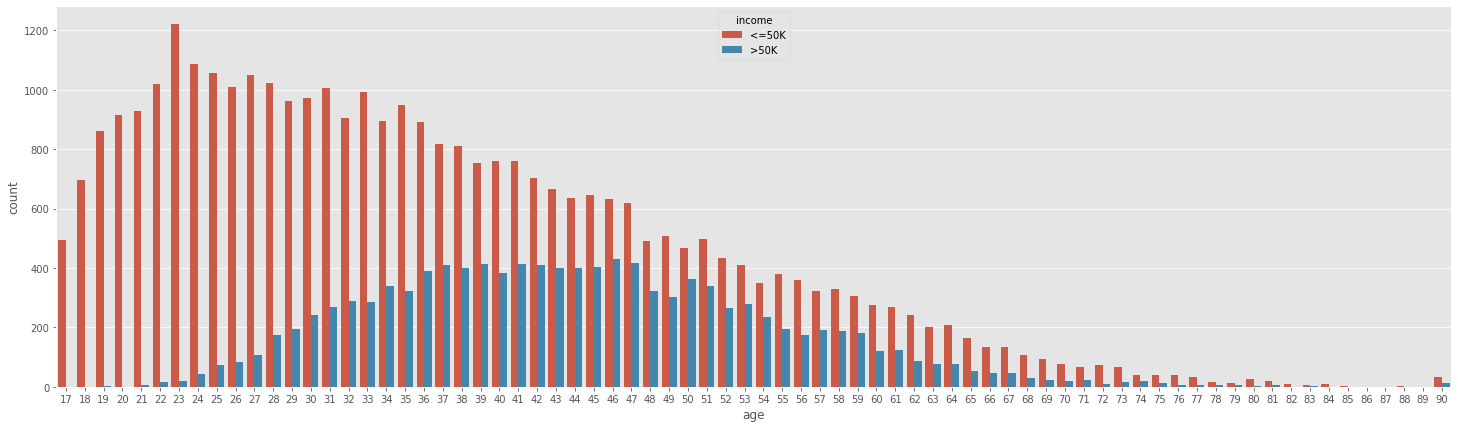

In [ ]:
# show count age by income


plt.figure(figsize=(25,7))
sns.countplot(x=df["age"],hue=df["income"])

- The young start working less income 50k, but the older "senior,manger" more income 50k

<AxesSubplot:xlabel='education_level', ylabel='count'>

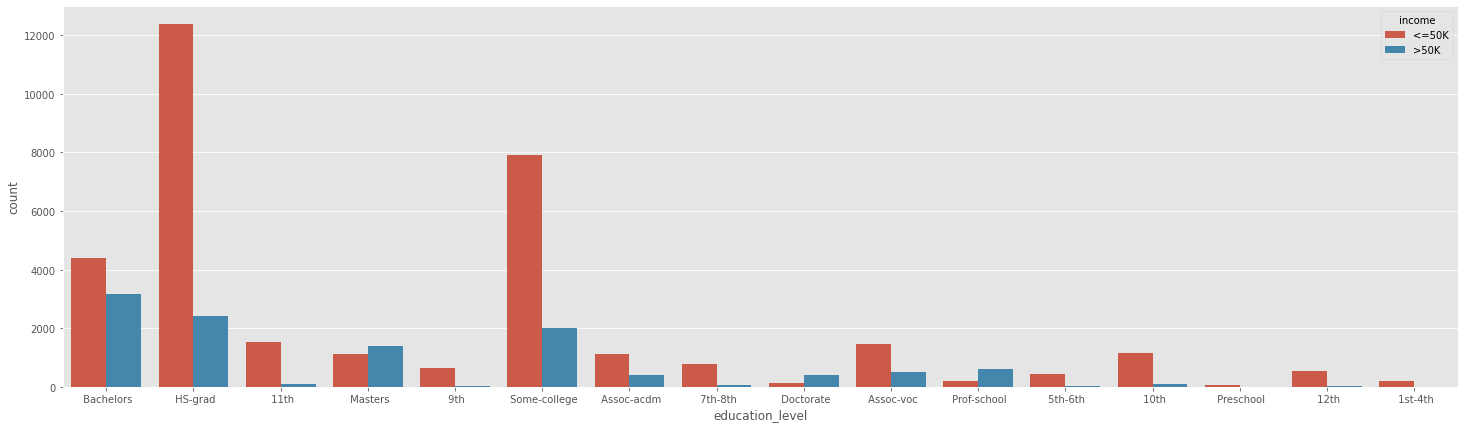

In [ ]:
# show count education level by income


plt.figure(figsize=(25,7))
sns.countplot(x=df["education_level"],hue=df["income"])

- The education level HS-grad have high salary

<AxesSubplot:xlabel='sex', ylabel='count'>

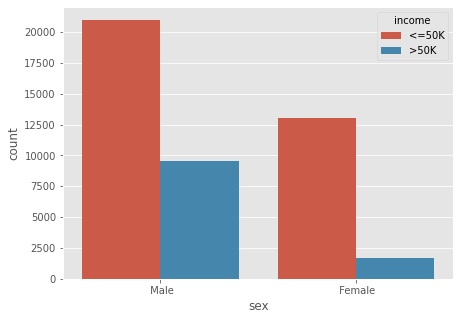

In [ ]:
# about the gender

plt.figure(figsize=(7,5))
sns.countplot(x=df["sex"],hue=df["income"])

- In general the Male highest salary than Female

<AxesSubplot:xlabel='race', ylabel='count'>

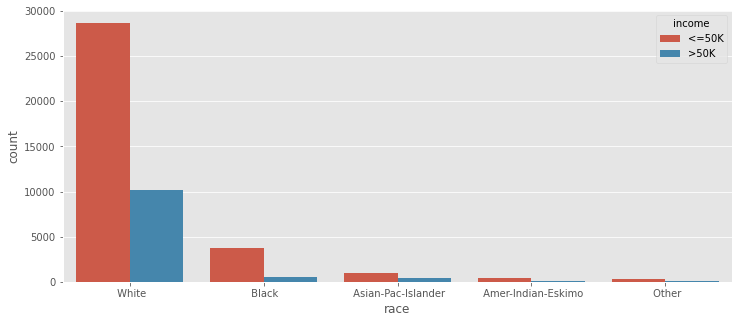

In [ ]:
# about the race

plt.figure(figsize=(12,5))
sns.countplot(x=df["race"],hue=df["income"])

- In general the Race - White have  highest salary

In [ ]:
# show count native country 


df['native-country'].value_counts(normalize=True)



 United-States                 0.913095
 Mexico                        0.019968
 Philippines                   0.006258
 Germany                       0.004268
 Puerto-Rico                   0.003870
 Canada                        0.003604
 El-Salvador                   0.003251
 India                         0.003251
 Cuba                          0.002941
 England                       0.002631
 China                         0.002499
 Jamaica                       0.002278
 South                         0.002233
 Italy                         0.002211
 Dominican-Republic            0.002145
 Japan                         0.001968
 Guatemala                     0.001902
 Vietnam                       0.001835
 Columbia                      0.001813
 Poland                        0.001791
 Haiti                         0.001526
 Portugal                      0.001371
 Iran                          0.001238
 Taiwan                        0.001216
 Greece                        0.001084


- The United-States have highest income

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

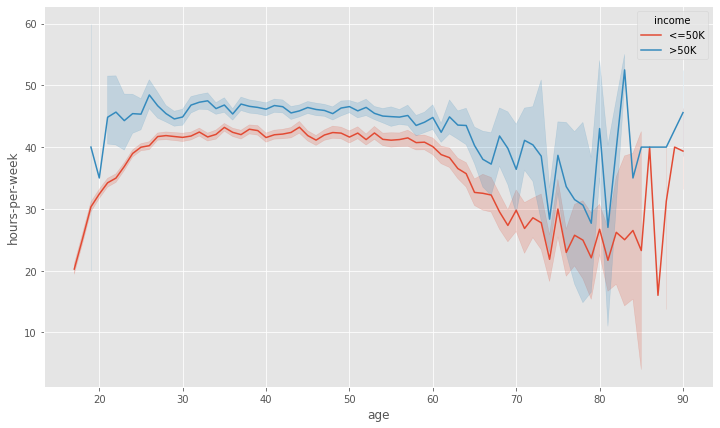

In [ ]:
# show the avg hours work by income and age

plt.figure(figsize=(12,7))
sns.lineplot(data=df,x="age",y="hours-per-week",hue="income")

- The higher the number of working hours, the higher the salary. If the age is over 60, the salary will decrease

<AxesSubplot:xlabel='relationship', ylabel='hours-per-week'>

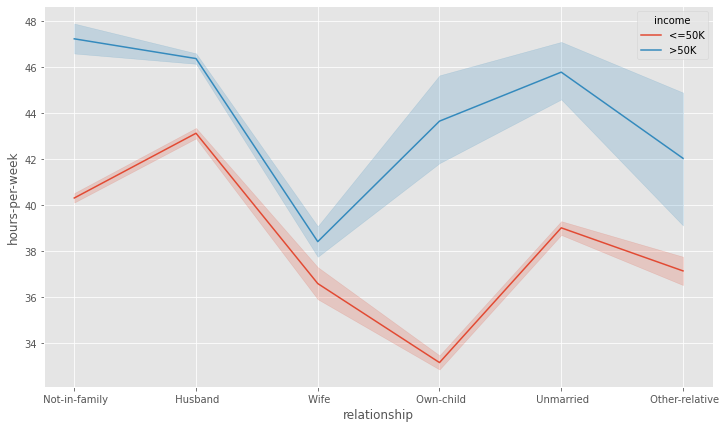

In [ ]:
# show the avg hours work by income and relationship

plt.figure(figsize=(12,7))
sns.lineplot(data=df,x="relationship",y="hours-per-week",hue="income")

- The husband work highest hours pre week , and the wife work less hours per week

In [ ]:
#interactive graph 

px.scatter(df,x="age",y="hours-per-week",color="income",animation_frame="education_level")

In [ ]:
#interactive graph 

px.scatter(df,x="age",y="hours-per-week",color="income",animation_frame="race")

# Analysis Results 🙉🙈🙊 

### After some analysis and visualizations I see some result.

### This DataSet about average income , 90% the data from USA.

#### The shape DataSet 
- (Row = 45222 , col =  14)

- No any missing values.

- Working private total income less 50k , also another work class the same not big different .

- The young start working less income 50k, but the older "senior,manger" more income 50k.


- The education level HS-grad have high salary.

- In general the Male highest salary than Female.

- In general the Race - White have highest salary.

- The United-States have highest income.

- The higher the number of working hours, the higher the salary. If the age is over 60, the salary will decrease.

- The husband work highest hours pre week , and the wife work less hours per week.



# Building a Machine Learning Model / classification Income

In [ ]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.inspection import permutation_importance

from sklearn.feature_selection import SelectPercentile ,chi2

from sklearn.feature_selection import SelectFromModel


In [ ]:
# look the data set
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
# look the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


### Shoute convert data type object using Label Encoder

In [ ]:
# separation the data type columns [ object and numeric ]

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=df[num]   # new dataframe just type numeric
data_c=df[cat]  # new dataframe just type object

In [ ]:
data_n.head()   # new dataframe just type numeric


,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


In [ ]:
data_c.head() # new dataframe just type object

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
col=data_c.columns
col

Index(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [ ]:
label_encoders = {}
categorical_columns = data_c.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_c.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
0,5,9,4,0,1,4,1,38,0
1,4,9,2,3,0,4,1,38,0
2,2,11,0,5,1,4,1,38,0
3,2,1,2,5,0,2,1,38,0
4,2,9,2,9,5,2,0,4,0


In [ ]:
 # merge 2 data set 
frames = [data_c, data_n]
  
data = pd.concat(frames,axis=1)
data.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,38,0,39,13.0,2174.0,0.0,40.0
1,4,9,2,3,0,4,1,38,0,50,13.0,0.0,0.0,13.0
2,2,11,0,5,1,4,1,38,0,38,9.0,0.0,0.0,40.0
3,2,1,2,5,0,2,1,38,0,53,7.0,0.0,0.0,40.0
4,2,9,2,9,5,2,0,4,0,28,13.0,0.0,0.0,40.0


In [ ]:
data.shape

(45222, 14)

In [ ]:
data.isnull().sum()

workclass          0
education_level    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
native-country     0
income             0
age                0
education-num      0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

In [ ]:
df.shape

(45222, 14)

- The same shape data set before and after change data type and no any missing value

<AxesSubplot:>

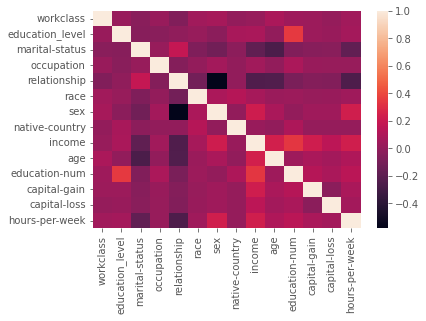

In [ ]:
sns.heatmap(data.corr())


# First : make classification using all columns

In [ ]:
#Defined X value and y value , and split the data train
X = data.drop(columns="income")           
y = data["income"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (31655, 13)
X Test  :  (13567, 13)
Y Train :  (31655,)
Y Test  :  (13567,)


In [ ]:
#Defined object from library classification 

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
XGB = XGBClassifier()
SVC=SVC()

In [ ]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() : 80.31989386010171
DecisionTreeClassifier() : 81.34443871157957
RandomForestClassifier() : 85.02985184639198
KNeighborsClassifier() : 83.82840716444314
MLPClassifier() : 82.42795017321441
KNeighborsClassifier() : 83.82840716444314
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 86.96100832903369
SVC() : 79.75971106361023


### Using all columns the best model  XGBClassifier = 86.9

# Second: make classification after **Standardscaler**

In [ ]:
data_sc=data
data_sc.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,38,0,39,13.0,2174.0,0.0,40.0
1,4,9,2,3,0,4,1,38,0,50,13.0,0.0,0.0,13.0
2,2,11,0,5,1,4,1,38,0,38,9.0,0.0,0.0,40.0
3,2,1,2,5,0,2,1,38,0,53,7.0,0.0,0.0,40.0
4,2,9,2,9,5,2,0,4,0,28,13.0,0.0,0.0,40.0


In [ ]:
scale=StandardScaler()
data_sc=scale.fit_transform(data_sc)
data_sc = pd.DataFrame(data_sc,columns=data.columns)

In [ ]:
data_sc.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,2.917717,-0.344074,0.942936,-1.482624,-0.258387,0.384110,0.693813,0.262999,-0.574031,0.034201,1.128753,0.142888,-0.21878,-0.078120
1,1.873997,-0.344074,-0.390005,-0.737534,-0.884479,0.384110,0.693813,0.262999,-0.574031,0.866417,1.128753,-0.146733,-0.21878,-2.326738
2,-0.213443,0.179902,-1.722946,-0.240806,-0.258387,0.384110,0.693813,0.262999,-0.574031,-0.041455,-0.438122,-0.146733,-0.21878,-0.078120
3,-0.213443,-2.439977,-0.390005,-0.240806,-0.884479,-2.018744,0.693813,0.262999,-0.574031,1.093385,-1.221559,-0.146733,-0.21878,-0.078120
4,-0.213443,-0.344074,-0.390005,0.752648,2.245982,-2.018744,-1.441310,-5.329300,-0.574031,-0.798015,1.128753,-0.146733,-0.21878,-0.078120


In [ ]:
data_sc=data_sc.astype('int64')

In [ ]:
data_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   workclass        45222 non-null  int64
 1   education_level  45222 non-null  int64
 2   marital-status   45222 non-null  int64
 3   occupation       45222 non-null  int64
 4   relationship     45222 non-null  int64
 5   race             45222 non-null  int64
 6   sex              45222 non-null  int64
 7   native-country   45222 non-null  int64
 8   income           45222 non-null  int64
 9   age              45222 non-null  int64
 10  education-num    45222 non-null  int64
 11  capital-gain     45222 non-null  int64
 12  capital-loss     45222 non-null  int64
 13  hours-per-week   45222 non-null  int64
dtypes: int64(14)
memory usage: 4.8 MB


In [ ]:
#Defined A value and b value , and split the data train
A = data_sc.drop(columns="income")           
b = data_sc["income"]    # y = quality

# split the data train and test
X_trains, X_tests, y_trains, y_tests = train_test_split(A,b, test_size=0.30, random_state=42)

print("X Train scale : ", X_trains.shape)
print("X Test scale : ", X_tests.shape)
print("Y Train scale: ", y_trains.shape)
print("Y Test scale  : ", y_tests.shape)

X Train scale :  (31655, 13)
X Test scale :  (13567, 13)
Y Train scale:  (31655,)
Y Test scale  :  (13567,)


In [ ]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
s = {}
for i in li:
    i.fit(X_trains,y_trains)
    ypreds = i.predict(X_tests)
    print(i,":",accuracy_score(y_tests,ypreds)*100)
    s.update({str(i):i.score(X_tests,y_tests)*100})

LogisticRegression() : 80.21670229232697
DecisionTreeClassifier() : 81.34443871157957
RandomForestClassifier() : 81.8603965504533
KNeighborsClassifier() : 77.88752119112553
MLPClassifier() : 81.9783297707673
KNeighborsClassifier() : 77.88752119112553
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 82.73752487653866
SVC() : 82.22893786393455


## After make  Standardscaler the best model XGBClassifier = 82.7

# Third: make classification after **feature selection** 50%

In [ ]:
data.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,38,0,39,13.0,2174.0,0.0,40.0
1,4,9,2,3,0,4,1,38,0,50,13.0,0.0,0.0,13.0
2,2,11,0,5,1,4,1,38,0,38,9.0,0.0,0.0,40.0
3,2,1,2,5,0,2,1,38,0,53,7.0,0.0,0.0,40.0
4,2,9,2,9,5,2,0,4,0,28,13.0,0.0,0.0,40.0


In [ ]:
F=data
p=data.income

In [ ]:
a=SelectPercentile(score_func=chi2 ,percentile=50) # 50% important columns
ab=a.fit_transform(F,p)
imp=a.get_support(indices=True)
imp

array([ 4,  8,  9, 10, 11, 12, 13])

- this important columns 

In [ ]:
new=data.iloc[:,[4,  8,  9, 10, 11, 12, 13]]
new.head()

,relationship,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,1,0,39,13.0,2174.0,0.0,40.0
1,0,0,50,13.0,0.0,0.0,13.0
2,1,0,38,9.0,0.0,0.0,40.0
3,0,0,53,7.0,0.0,0.0,40.0
4,5,0,28,13.0,0.0,0.0,40.0


In [ ]:
#Defined I value and i value , and split the data train
I = new.drop(columns="income")           
i = new["income"]    # y = quality

# split the data train and test
X_traini, X_testi, y_traini, y_testi = train_test_split(I,i, test_size=0.30, random_state=42)

print("X Train scale : ", X_traini.shape)
print("X Test scale : ", X_testi.shape)
print("Y Train scale: ", y_traini.shape)
print("Y Test scale  : ", y_testi.shape)

X Train scale :  (31655, 6)
X Test scale :  (13567, 6)
Y Train scale:  (31655,)
Y Test scale  :  (13567,)


In [ ]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
v = {}
for i in li:
    i.fit(X_traini,y_traini)
    ypredi = i.predict(X_testi)
    print(i,":",accuracy_score(y_testi,ypredi)*100)
    v.update({str(i):i.score(X_testi,y_testi)*100})

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() : 82.16997125377755
DecisionTreeClassifier() : 83.1060661900199
RandomForestClassifier() : 84.10112773641926
KNeighborsClassifier() : 83.98319451610526
MLPClassifier() : 81.81617159283554
KNeighborsClassifier() : 83.98319451610526
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 86.18707157072308
SVC() : 79.75971106361023


## After make feature selection 50%-important columns-  the best model XGBClassifier = 86.1

# Forth :Feature selection depends the model 

In [ ]:
data.head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,age,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,38,0,39,13.0,2174.0,0.0,40.0
1,4,9,2,3,0,4,1,38,0,50,13.0,0.0,0.0,13.0
2,2,11,0,5,1,4,1,38,0,38,9.0,0.0,0.0,40.0
3,2,1,2,5,0,2,1,38,0,53,7.0,0.0,0.0,40.0
4,2,9,2,9,5,2,0,4,0,28,13.0,0.0,0.0,40.0


In [ ]:
model_f=data

In [ ]:
F=model_f
f=model_f.income

### Defined object from library classification 

- LR = LogisticRegression()
- DTR = DecisionTreeClassifier()
- RFR = RandomForestClassifier()
- XGB = XGBClassifier()


In [ ]:
model  = [LR,DTR,RFR,XGB]

for i in model :
    sel=SelectFromModel(i)
    sel.fit(F,f)
    sel.get_support(indices=True)
    print(sel.get_support(indices=True))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[0 2 4 8]
[8]
[8]
[8]


In [ ]:
new_import=data.iloc[:,[0 ,2 ,4 ,8]]
new_import.head()

,workclass,marital-status,relationship,income
0,5,4,1,0
1,4,2,0,0
2,2,0,1,0
3,2,2,0,0
4,2,2,5,0


In [ ]:
#Defined I value and i value , and split the data train
P = new_import.drop(columns="income")           
p = new_import["income"]   

# split the data train and test
X_trainf, X_testf, y_trainf, y_testf = train_test_split(P,p, test_size=0.30, random_state=42)

print("X Train  : ", X_trainf.shape)
print("X Test  : ", X_testf.shape)
print("Y Train : ", y_trainf.shape)
print("Y Test   : ", y_testf.shape)

X Train  :  (31655, 3)
X Test  :  (13567, 3)
Y Train :  (31655,)
Y Test   :  (13567,)


In [ ]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
u = {}
for i in li:
    i.fit(X_trainf,y_trainf)
    ypredf = i.predict(X_testf)
    print(i,":",accuracy_score(y_testf,ypredf)*100)
    u.update({str(i):i.score(X_testf,y_testf)*100})

LogisticRegression() : 75.13083216628584
DecisionTreeClassifier() : 76.49443502616643
RandomForestClassifier() : 76.47969337362719
KNeighborsClassifier() : 76.70818898798555
MLPClassifier() : 76.37650180585244
KNeighborsClassifier() : 76.70818898798555
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 76.4575808948183
SVC() : 76.41335593720055


## After make Feature selection depends the model  - all the model same result

# Model Selection Results 😃😃😃 

### After making process for found the best model :

- Using all columns the best model XGBClassifier = 86.9

- After make Standardscaler the best model XGBClassifier = 82.7

- After make feature selection 50%-important columns- the best model XGBClassifier = 86.1

- After make Feature selection depends the model - all the model same result



#### So , the best model XGBClassifier

- You can change parameter in the library , maybe get better accuracy


# Notes 😃😃😃😃

- Thank for reading my analysis and my classification. 😃😃😃😃

- If you any questions or advice me please write in the comment . ❤️❤️❤️❤️

- If anyone has a model with a higher percentage, please tell me 🤝🤝🤝, it`s will support me .

# Vote ❤️😃

- If you liked my work upvote me ,


# The End 🤝🎉🤝🎉